In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as pl

In [42]:
r = 8.314 * u.J / (u.K * u.mol)

# here are Ea and D0/a2 values for mus from hames&bowring1994,robbins72
# taken from reiners 2004
#energy = 180 * 1e3 * u.J / u.mol
#geom = 1
#diff = 3.91 / u.s

energy = 263592 * u.J / u.mol
geom = 1
D0 = 2.3e-4 * u.m**2 / u.s
a = 100.0 * 1e-6 * u.m
diff = D0 / a**2

In [43]:
cooling = np.linspace(0.1, 100, 1001) / 1e6 * u.K / u.year


In [44]:
def guess_Tc(temp_guess, cooling, r, energy, geom, diff):

    tau = r * temp_guess**2 / (energy * cooling)
    
    Tc = energy / (r * np.log(geom * tau * diff))
    
    return Tc

In [45]:



Tc_final = np.zeros(cooling.shape) * u.K

Tci = 400.0 * u.K

n_iter = 10

Tcis = []

for i in range(n_iter):
    
    Tci = guess_Tc(Tci, cooling, r, energy, geom, diff)
    
    Tcis.append(Tci)
    
    Tc_final = np.array(Tcis)[-1]
    
print(Tcis[0], Tcis[1])

[703.8054822  714.79616429 721.38795981 ... 831.23340801 831.2552128
 831.27699694] K [686.58164657 696.56237913 702.53476916 ... 800.52971898 800.54888218
 800.56802712] K


(600.0, 0.0)

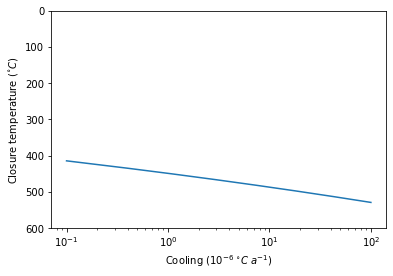

In [46]:
fig, ax = pl.subplots(1, 1, figsize=(6, 4))

ax.plot(cooling * 1e6, Tc_final -273.15)

ax.set_xscale('log')

ax.set_xlabel(r'Cooling ($10^{-6}\; ^{\circ}C \;a^{-1}$)')

ax.set_ylabel(r'Closure temperature ($^{\circ}C$)')

ax.set_ylim(600, 0)

In [29]:
np.array(Tcis).shape

(10, 1001)